In [10]:
### This notebook plot figures for figure 1
import pandas as pd
import os
import numpy as np
from collections import Counter


#Plot parameters
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib.pyplot import figure
import seaborn as sns
from matplotlib import gridspec

In [11]:
### Generate the label dictionary
dir_cohort = '../anno_ref/cohorts'
feature_type = 'histology'
df_feat = pd.read_csv(os.path.join(dir_cohort,feature_type+'.csv'))
dict_feat_np = dict(Counter(df_feat[feature_type]))
dict_feat_np = {k: v for k, v in sorted(dict_feat_np.items(), key=lambda item: item[1])}

### Mutation bias plot - data

In [46]:
# Read mutation category data
df_mutcateg = pd.read_csv('./figure1/mut_categs.csv', index_col = 0)
df_mutcateg = df_mutcateg.dropna()
lfeat = df_mutcateg['feature'].unique().tolist()

FINISHOvary-AdenoCA
FINISHCNS-PiloAstro
FINISHLiver-HCC
FINISHCNS-Oligo
FINISHPanc-Endocrine
FINISHKidney-RCC
FINISHProst-AdenoCA
FINISHThy-AdenoCA
FINISHColoRect-AdenoCA
FINISHLymph-BNHL
FINISHUterus-AdenoCA
FINISHBreast-AdenoCA
FINISHLung-AdenoCA
FINISHPanc-AdenoCA
FINISHEso-AdenoCA
FINISHHead-SCC
FINISHCNS-Medullo
FINISHCNS-GBM
FINISHSoftTissue-Leiomyo
FINISHCervix-SCC
FINISHSkin-Melanoma
FINISHLymph-CLL
FINISHSoftTissue-Liposarc
FINISHKidney-ChRCC
FINISHStomach-AdenoCA
FINISHLung-SCC
FINISHBladder-TCC
FINISHMyeloid-AML
FINISHBiliary-AdenoCA
FINISHBreast-LobularCA
FINISHCervix-AdenoCA
FINISHBone-Osteosarc
FINISHBreast-DCIS
FINISHMyeloid-MPN
FINISHMyeloid-MDS
FINISHBone-Cart
FINISHBone-Osteoblast
FINISHBone-Epith
FINISHBone-Benign


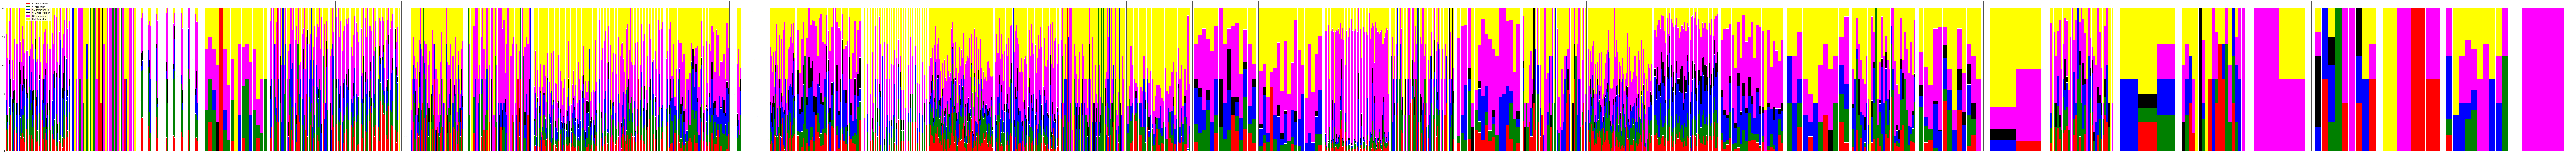

In [118]:
fig, axs = plt.subplots(nrows=1, ncols=len(lfeat),figsize=(250,15))
color_sets = ['red','green','blue','black','magenta','yellow']

for i in range(0,len(lfeat)):
    df_his = df_mutcateg[df_mutcateg['feature'] == lfeat[i]]
    n_patient = len(df_his)

    if i> 0:
        df_his.plot.bar(stacked = True,ax = axs[i],width = 1, color = color_sets, legend = False)
        axs[i].set_xticklabels('')
        axs[i].set_yticklabels('')
    else:
        df_his.plot.bar(stacked = True,ax = axs[i],width = 1, color = color_sets)
        axs[i].set_xticklabels('')
    print(f'FINISH{lfeat[i]}')
    
plt.tight_layout()
# plt.imshow()
plt.savefig('./figure1/mut_bias.pdf')

### Mutation heterogeneity plot - data

In [44]:
params = {'legend.fontsize': 'xx-large',
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large',
         'lines.linewidth':4,
         'font.sans-serif':'Ariel',
         'font.weight':'bold',
          'font.size':15,
         'axes.labelweight':'bold'}

pylab.rcParams.update(params)

In [30]:
df_all = pd.read_csv('./figure1/mut_hete_patients_silent.csv')
df_all['syn_freq'] = df_all['n_silent']/float(7564562)*float(1000000)
df_all.loc[df_all['syn_freq']==0, 'syn_freq'] = 0.001
df_all['syn_freq'] = np.log10(df_all['syn_freq'])
group = df_all[['feature','syn_freq']].groupby(by = ['feature'])
sort_idx = group.median().sort_values(by = 'syn_freq').index

In [8]:
sort_idx ### sorted index for plot

Index(['CNS-PiloAstro', 'Bone-Benign', 'Bone-Osteoblast', 'Myeloid-MDS',
       'Bone-Cart', 'Myeloid-MPN', 'CNS-Medullo', 'Bone-Epith', 'Breast-DCIS',
       'Thy-AdenoCA', 'Kidney-ChRCC', 'Myeloid-AML', 'Panc-Endocrine',
       'Lymph-CLL', 'CNS-Oligo', 'Prost-AdenoCA', 'Bone-Osteosarc',
       'SoftTissue-Liposarc', 'Breast-LobularCA', 'SoftTissue-Leiomyo',
       'Cervix-AdenoCA', 'Biliary-AdenoCA', 'Panc-AdenoCA', 'Breast-AdenoCA',
       'Kidney-RCC', 'Lymph-BNHL', 'CNS-GBM', 'Ovary-AdenoCA',
       'Uterus-AdenoCA', 'Liver-HCC', 'Cervix-SCC', 'Stomach-AdenoCA',
       'Head-SCC', 'ColoRect-AdenoCA', 'Bladder-TCC', 'Lung-AdenoCA',
       'Eso-AdenoCA', 'Lung-SCC', 'Skin-Melanoma'],
      dtype='object', name='feature')

<ipython-input-47-80300da5c5be>:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axs = plt.subplot(spec[1,i])
<ipython-input-47-80300da5c5be>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axs = plt.subplot(spec[1,i])
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


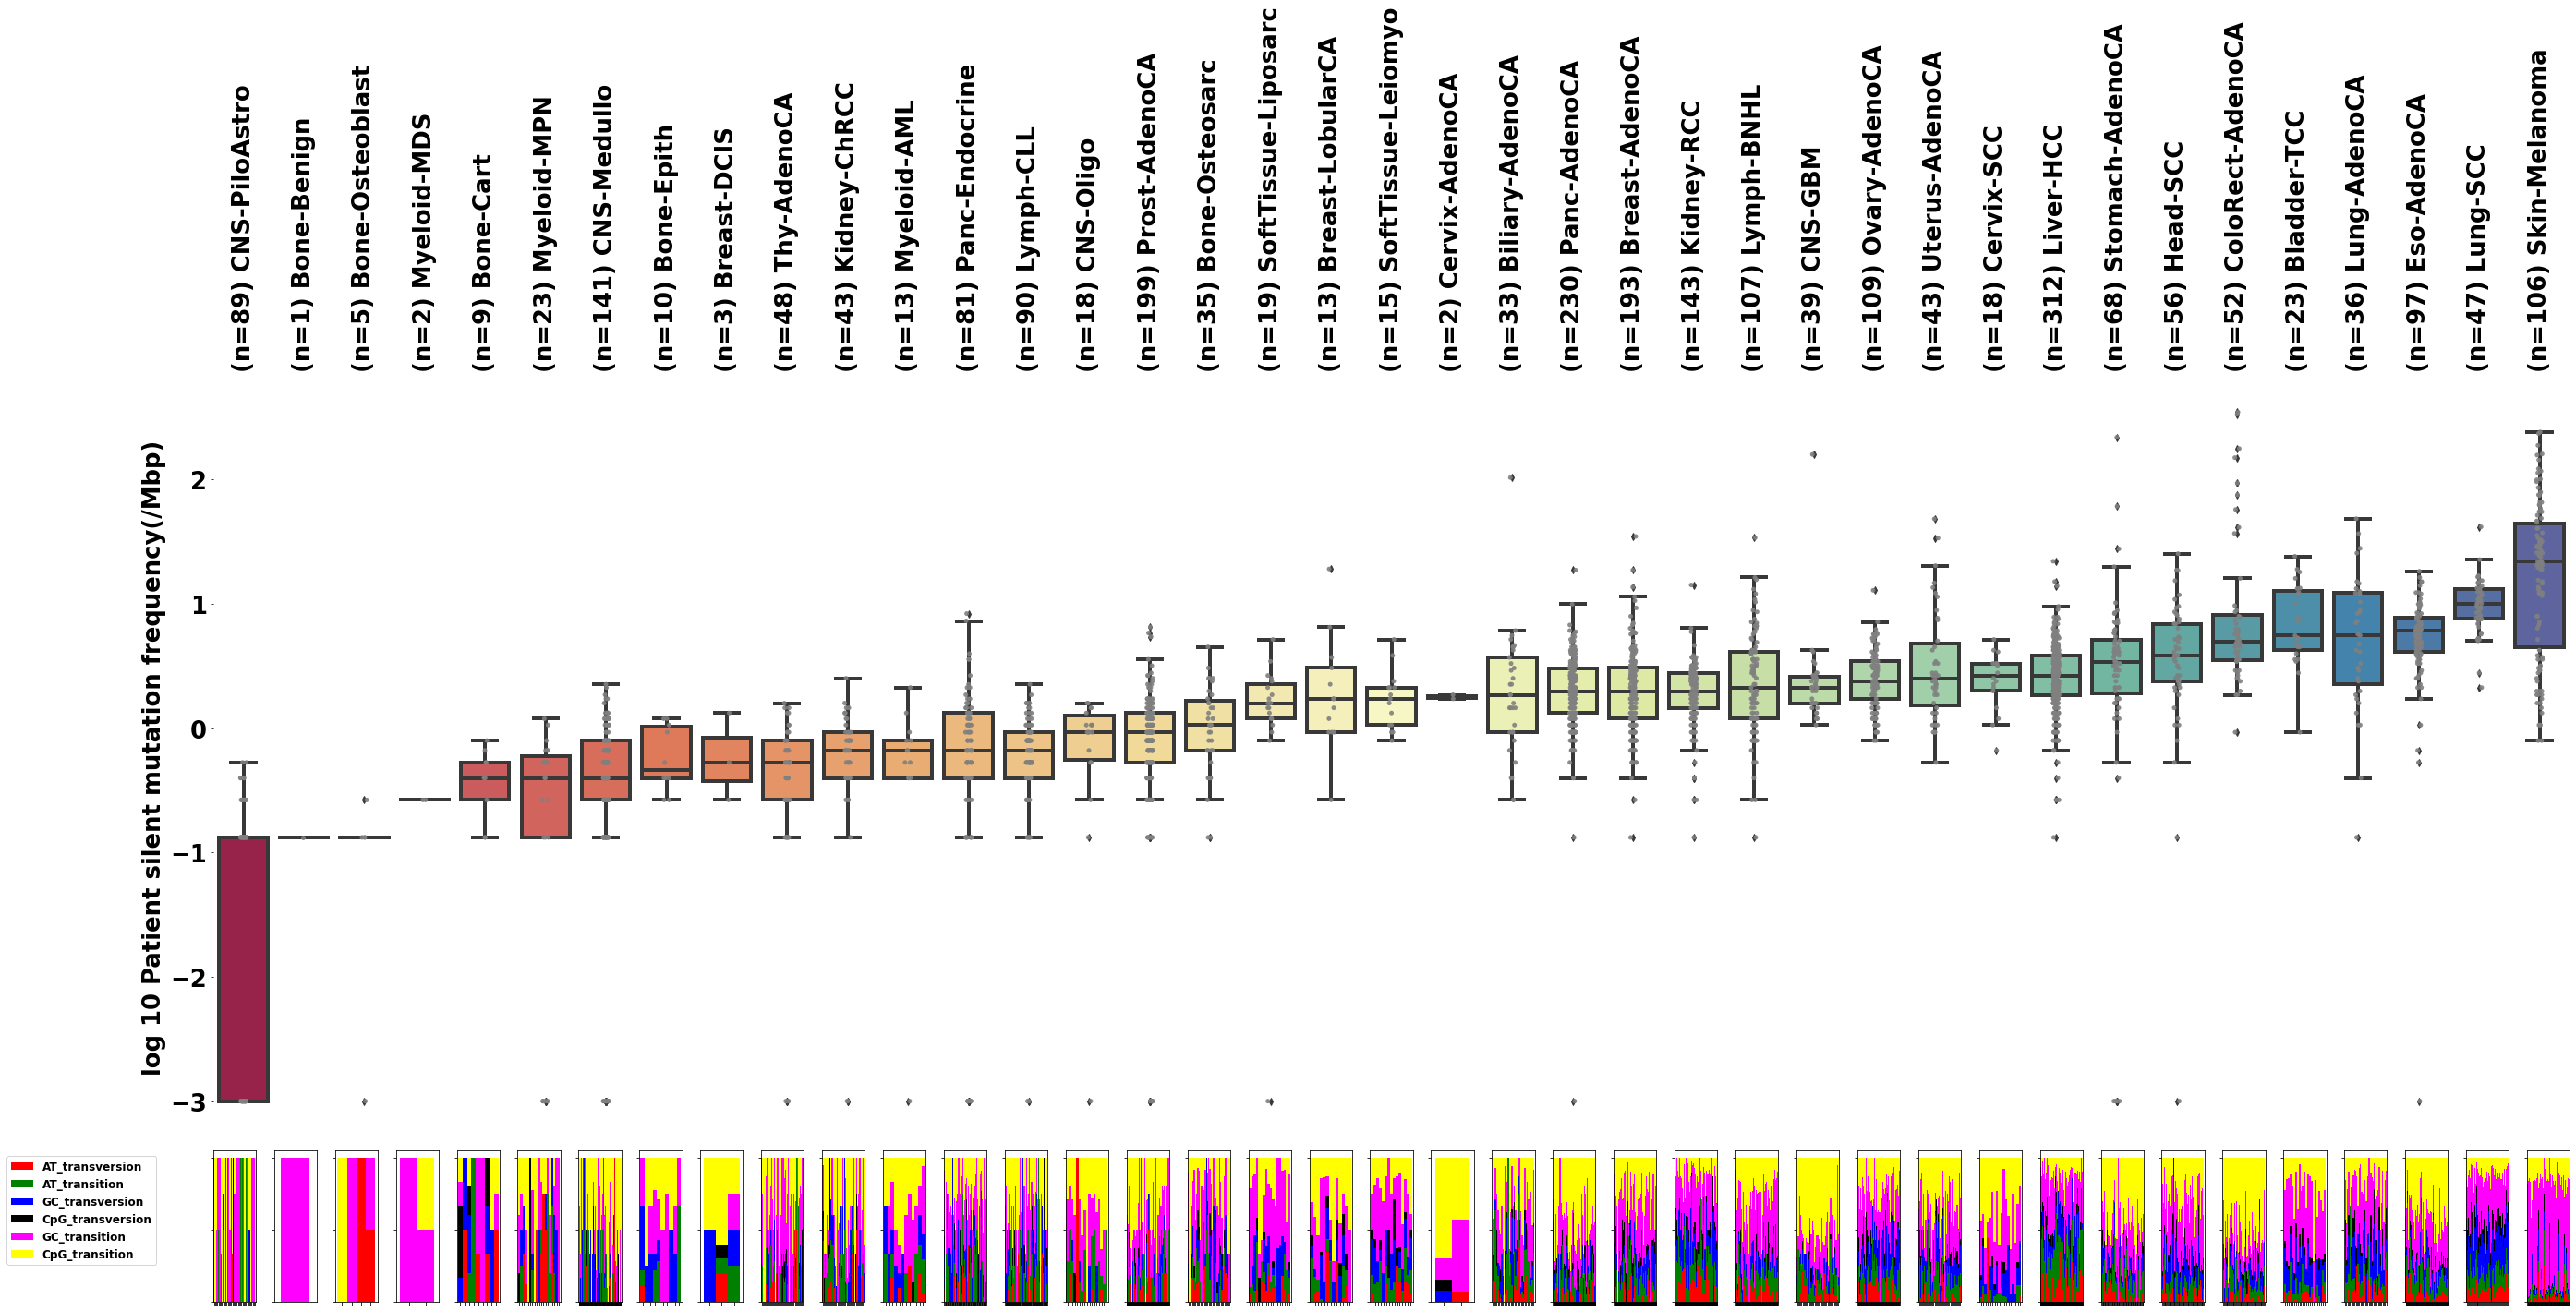

In [47]:
### Plot mutation heterogeneity plot-----------
fig = plt.figure(figsize =(39,20))
spec = gridspec.GridSpec(ncols=39, nrows=2,
                         height_ratios=[5, 1])
fig.add_subplot(spec[0,:])
ax = sns.boxplot(x="feature", y="syn_freq", data=df_all, order = sort_idx, palette = "Spectral")
ax = sns.stripplot(x="feature", y="syn_freq", data=df_all,order = sort_idx, color = 'grey', jitter=0.05, alpha = 0.9)
ax.set_ylabel('log 10 Patient silent mutation frequency(/Mbp)');ax.set_xlabel('')
labels = [] # new label with patient number
for label in ax.get_xticklabels():
    feat = label.get_text()
    new_label = '(n='+str(dict_feat_np[feat])+') '+feat
    labels.append(new_label)
    label.set_ha("right")
#     label.set_rotation(90)
ax.set_xticklabels(labels) #reset new label number
ax.tick_params(axis='x', which='major',labelbottom = False, bottom=False, top = False, labeltop=True,rotation = 90)
sns.despine(left=True, bottom=True)

### plot mutation bias plot---------------------
color_sets = ['red','green','blue','black','magenta','yellow']
for i in range(0,len(lfeat)):
    df_his = df_mutcateg[df_mutcateg['feature'] == sort_idx[i]]
    n_patient = len(df_his)
    if i> 0:
        fig.add_subplot(spec[1,i])
        axs = plt.subplot(spec[1,i])
        df_his.plot.bar(stacked = True,ax = axs,width = 1, color = color_sets, legend = False)
        axs.set_xticklabels('')
        axs.set_yticklabels('')
    else:
        fig.add_subplot(spec[1,i])
        axs = plt.subplot(spec[1,i])
        df_his.plot.bar(stacked = True,ax = axs,width = 1, color = color_sets)
        axs.set_xticklabels('')
        axs.set_yticklabels('')
        axs.legend(bbox_to_anchor=(-1.2, 1),prop=dict(size=12))

#     print(f'FINISH{lfeat[i-1]}')

plt.tight_layout()
# plt.imshow()
# plt.savefig('./figure1/mut_hete_bias.pdf')

### Mutation Global Pie plot

In [6]:
import pickle
### Load pie data
sizes = pickle.load(open('./figure1/pie_size.pkl','rb'))
labels = ['Missense','Silent','Other']


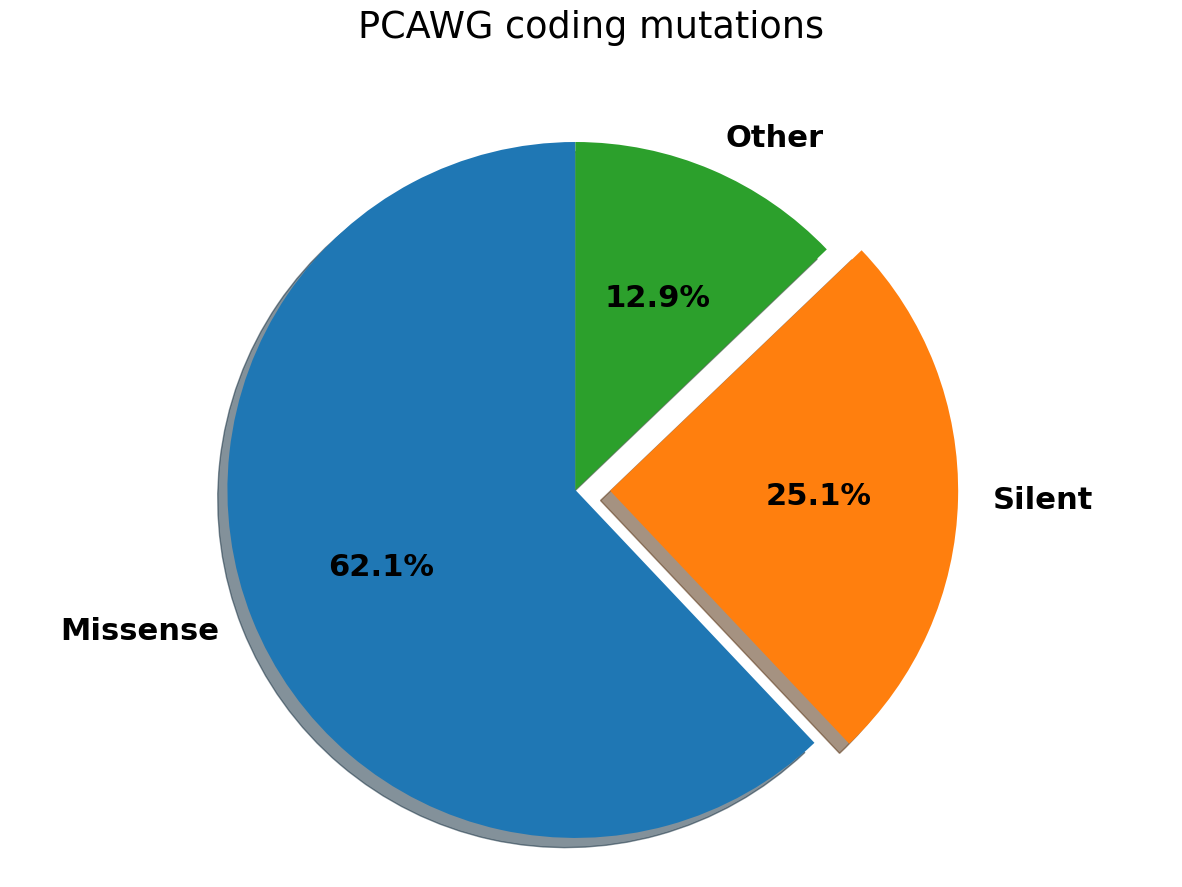

In [17]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'font.size': 22, 'axes.titlepad':50.0,'font.weight':'bold'})

fig, ax= plt.subplots(figsize = (15,10))
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('PCAWG coding mutations')
plt.savefig('./figure1/pie_plot.pdf')